In [1]:
%matplotlib inline
import numpy as np
from pylab import *

## Aufgabe 4.3-7

In [2]:
# Matrix A fuer Aufgabe 4.3-7
x_mess = np.array([0, 1, 3, 4])
A = np.array([[1, 0], [1, 1], [1, 3], [1, 4]])
print(A.shape, 'Form A')
print('A', A)

# Vektor b
b = np.array([0, 8, 8, 20])

(4, 2) Form A
A [[1 0]
 [1 1]
 [1 3]
 [1 4]]


In [3]:
# Matrix A trasponieren
AT = A.transpose()
print(AT.shape, 'Form A^T')
print(AT)

(2, 4) Form A^T
[[1 1 1 1]
 [0 1 3 4]]


In [4]:
# Matrixprodukt A^TA
ATA = AT.dot(A)
print('Form A^TA', ATA.shape)
print(ATA)

Form A^TA (2, 2)
[[ 4  8]
 [ 8 26]]


In [5]:
# Rechte Seite A^Tb
ATb = AT.dot(b)
print('A^Tb', ATb)

A^Tb [ 36 112]


In [6]:
# Loesung fuer A^TAx_fit = A^Tb
x_fit = np.linalg.solve(ATA, ATb)
print('x_fit', x_fit)

x_fit [1. 4.]


In [7]:
# Projektionsvektor
p = A.dot(x_fit)
print('p', p)

# Fehlervektor (Error)
e = b - p
print('e', e)

p [ 1.  5. 13. 17.]
e [-1.  3. -5.  3.]


In [8]:
# Fehlerquadrate
Fehlerquadrate = np.linalg.norm(e)**2
print('||e||^2 = ', Fehlerquadrate)

||e||^2 =  44.0


## Automatisierung 

In [9]:
def fitting(A, b):
    print('--------', 'Matrix A', '--------')
    print(A.shape, 'Form')
    print(A)
    
    # Matrix A trasponieren
    AT = A.transpose()
    print('--------', 'Matrix A^T', '--------')
    print(AT.shape, 'Form')
    print(AT)
    
    # Matrixprodukt A^TA
    ATA = AT.dot(A)
    print('--------', 'Matrix A^TA', '--------')
    print(ATA.shape, 'Form')
    print(ATA)
    
    # Rechte Seite A^Tb
    ATb = AT.dot(b)
    print('--------', 'Matrix A^Tb', '--------')
    print(ATb)
    
    print('-'*29)
    # Loesung fuer A^TAx_fit = A^Tb
    x_fit = np.linalg.solve(ATA, ATb)
    print('x_fit =', x_fit)
    
    # Projektionsvektor
    p = A.dot(x_fit)
    print('p = Ax_fit =', p)
    
    # Fehlervektor (Error)
    e = b - p
    print('e=b-p =', e)
    
    # Fehlerquadrate
    Fehlerquadrate = np.linalg.norm(e)**2
    print('||e||^2 =', Fehlerquadrate)
    
    def fit_function(coeff, x_mess):
        x_fine = np.linspace(x_mess[0], x_mess[-1], 50)
        #print(x_fine)

        # x_fit = np.array([c0, c1, ...])
        # y_fit = c0x_fine^0 + c1x_fine^1 + c2x_fine^2 ...
        
        y_fit = 0
        for i in range(len(coeff)):
            y_fit += coeff[i]*x_fine**i
        return x_fine, y_fit
    
    # Ausgleichsfunktion
    x_ausgleich, y_ausgleich = fit_function(coeff=x_fit, x_mess=x_mess)
    
    figure()
    plot(x_mess, b, 'xk', label='Messwerte')
    plot(x_ausgleich, y_ausgleich, 'r-')
    show()
    

-------- Matrix A --------
(4, 3) Form
[[ 1  0  0]
 [ 1  1  1]
 [ 1  3  9]
 [ 1  4 16]]
-------- Matrix A^T --------
(3, 4) Form
[[ 1  1  1  1]
 [ 0  1  3  4]
 [ 0  1  9 16]]
-------- Matrix A^TA --------
(3, 3) Form
[[  4   8  26]
 [  8  26  92]
 [ 26  92 338]]
-------- Matrix A^Tb --------
[ 36 112 400]
-----------------------------
x_fit = [2.         1.33333333 0.66666667]
p = Ax_fit = [ 2.  4. 12. 18.]
e=b-p = [-2.  4. -4.  2.]
||e||^2 = 40.00000000000001


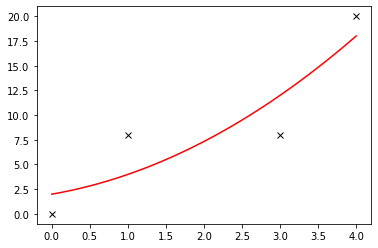

In [10]:
################
# Aufgabe 4.3-9
################
A = np.array([[1, 0, 0], [1, 1, 1], [1, 3, 9], [1, 4, 16]])
b = np.array([0, 8, 8, 20])

# fitten
fitting(A=A, b=b)

-------- Matrix A --------
(4, 4) Form
[[ 1  0  0  0]
 [ 1  1  1  1]
 [ 1  3  9 27]
 [ 1  4 16 64]]
-------- Matrix A^T --------
(4, 4) Form
[[ 1  1  1  1]
 [ 0  1  3  4]
 [ 0  1  9 16]
 [ 0  1 27 64]]
-------- Matrix A^TA --------
(4, 4) Form
[[   4    8   26   92]
 [   8   26   92  338]
 [  26   92  338 1268]
 [  92  338 1268 4826]]
-------- Matrix A^Tb --------
[  36  112  400 1504]
-----------------------------
x_fit = [ 1.48287180e-13  1.56666667e+01 -9.33333333e+00  1.66666667e+00]
p = Ax_fit = [1.4828718e-13 8.0000000e+00 8.0000000e+00 2.0000000e+01]
e=b-p = [-1.48287180e-13  2.30926389e-13 -1.27897692e-13  5.68434189e-14]
||e||^2 = 9.490507883605198e-26


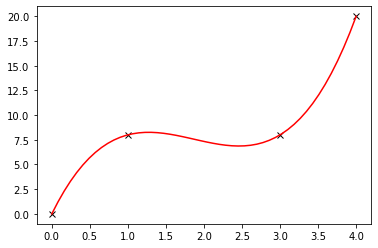

In [11]:
################
# Aufgabe 4.3-10
################

A = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [1, 3, 9, 27], [1, 4, 16, 64]])
b = np.array([0, 8, 8, 20])

# fitten
fitting(A=A, b=b)

-------- Matrix A --------
(4, 2) Form
[[1 0]
 [1 1]
 [1 3]
 [1 4]]
-------- Matrix A^T --------
(2, 4) Form
[[1 1 1 1]
 [0 1 3 4]]
-------- Matrix A^TA --------
(2, 2) Form
[[ 4  8]
 [ 8 26]]
-------- Matrix A^Tb --------
[ 36 112]
-----------------------------
x_fit = [1. 4.]
p = Ax_fit = [ 1.  5. 13. 17.]
e=b-p = [-1.  3. -5.  3.]
||e||^2 = 44.0


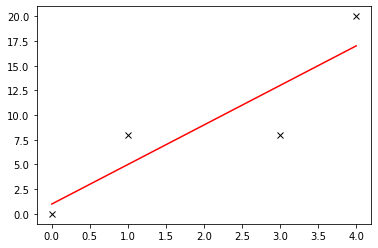

In [12]:
# Matrix A fuer Aufgabe 4.3-1
A = np.array([[1, 0], [1, 1], [1, 3], [1, 4]])
b = np.array([0, 8, 8, 20])
fitting(A=A, b=b)

-------- Matrix A --------
(4, 1) Form
[[1]
 [1]
 [1]
 [1]]
-------- Matrix A^T --------
(1, 4) Form
[[1 1 1 1]]
-------- Matrix A^TA --------
(1, 1) Form
[[4]]
-------- Matrix A^Tb --------
[36]
-----------------------------
x_fit = [9.]
p = Ax_fit = [9. 9. 9. 9.]
e=b-p = [-9. -1. -1. 11.]
||e||^2 = 204.00000000000003


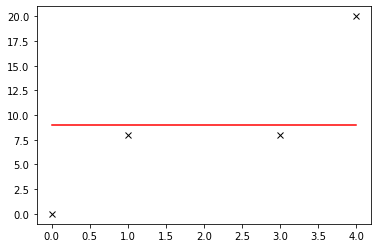

In [13]:
# Matrix A fuer Aufgabe 4.3-5
A = np.array([[1], [1], [1], [1]])
b = np.array([0, 8, 8, 20])

# fitten
fitting(A=A, b=b)

-------- Matrix A --------
(4, 1) Form
[[0]
 [1]
 [3]
 [4]]
-------- Matrix A^T --------
(1, 4) Form
[[0 1 3 4]]
-------- Matrix A^TA --------
(1, 1) Form
[[26]]
-------- Matrix A^Tb --------
[112]
-----------------------------
x_fit = [4.30769231]
p = Ax_fit = [ 0.          4.30769231 12.92307692 17.23076923]
e=b-p = [ 0.          3.69230769 -4.92307692  2.76923077]
||e||^2 = 45.53846153846156


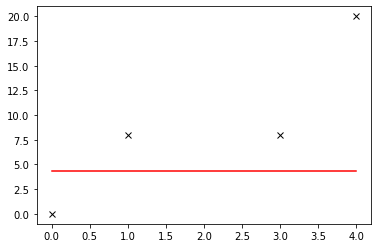

In [14]:
# Matrix A fuer Aufgabe 4.3-7
A = np.array([[0], [1], [3], [4]])
b = np.array([0, 8, 8, 20])

# fitten
fitting(A=A, b=b)

In [ ]:
# Ueberlegen Sie warum nun der Plot falsch ist?